# Wine Quality Project

In [48]:
# importo le librerie

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
from scipy.stats import poisson, randint

In [2]:
# carico il dataset dividendo tra features e labels
features, target = datasets.load_wine(return_X_y = True, as_frame = True)

In [3]:
# stampo matrice delle features
display(features)
# stampo vettore target
display(target)

# mostro quante sono le possibili labels
pd.unique(target)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

array([0, 1, 2])

In [4]:
# divido in training set e test set, utilizzando il 30% dei dati per il test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30)

In [16]:
# creo il modello
tree = DecisionTreeClassifier()

# creo distribuzione degli iperparametri
depth_distribution = {'max_depth': poisson(mu = 10), 'max_leaf_nodes': randint(low = 5, high = 35), 'random_state' : [42]}

# valido gli iperparametri
clf = RandomizedSearchCV(estimator = tree, n_iter = 10, param_distributions = depth_distribution, n_jobs = -1, scoring = 'accuracy', cv = 5, random_state = 42)

# addestro il modello
clf.fit(X_train, y_train)

# stampo i migliori valori dei parametri
print(f'i migliori valori dei parametri sono: {clf.best_params_}')

# valuto la accuratezza media della migliore combinazione di parametri
tree_score = clf.best_score_
print(f"l'accuratezza media del miglior modello è {tree_score}")
                                                  
# valuto l'accuratezza sul test set
tree_test_score = accuracy_score(y_test, clf.predict(X_test))
print(f"l'accuratezza sul test set è {tree_test_score}")

i migliori valori dei parametri sono: {'max_depth': 12, 'max_leaf_nodes': 11, 'random_state': 42}
l'accuratezza media del miglior modello è 0.9436666666666665
l'accuratezza sul test set è 0.8518518518518519


In [6]:
# controllo che la precisione non sia dovuta a una classe prevalente
target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

Il modello Decision Tree fornisce già dei buoni risultati sul test set (precisione del 85%). Tuttavia, passando ad un modello Random Forest, si potrebbe ulteriormente ridurre la varianza eccessiva del modello e quindi un eventuale lieve overfitting.

In [17]:
# creo il modello
random_forest = RandomForestClassifier()

# creo un dizionario coi possibili valori dei parametri
params = {'n_estimators': poisson(mu = 100), 'max_features': randint(low = 3, high = 13), 'random_state' : [42]}

# valido i parametri 
clf = RandomizedSearchCV(estimator = random_forest, param_distributions = params, n_jobs =-1, scoring = 'accuracy', cv = 5, n_iter = 10, random_state = 42)
clf.fit(X_train, y_train)

# controllo i migliori valori dei iperparametri e la loro accuratezza
print(f""" I migliori valori degli iperparametri sono: {clf.best_params_} 
 La loro accuratezza media sul training set è {clf.best_score_}""")

 I migliori valori degli iperparametri sono: {'max_features': 5, 'n_estimators': 85, 'random_state': 42} 
 La loro accuratezza media sul training set è 0.9916666666666666


In [18]:
# calcolo l'accuratezza del modello sul test set
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9629629629629629


Come si può notare l'accuratezza del modello sul test set è aumentata oltre del 10%. Si potrebbe anche valutare di eliminare alcune features e verificare se ciò comporta una diminuzione nella precisione del modello.

In [63]:
# guardo i punteggi delle features usando SelectKbest
selector = SelectKBest(k = 'all')

# applico il selezionatore solo al training set, e stampo i punteggi delle feature
selector.fit(X_train, y_train)

# creo un dataframe con l'importanza di ogni feature 
feature_imp = pd.Series(selector.scores_, index = X_train.columns)

# ordino le features per importanza
feature_imp.sort_values(inplace= True, ascending = False)

# stampo il dataFrame
feature_imp

proline                         189.889558
flavanoids                      140.026250
od280/od315_of_diluted_wines    125.530209
alcohol                         105.033970
color_intensity                  72.676151
hue                              63.134695
total_phenols                    59.140251
alcalinity_of_ash                25.400987
proanthocyanins                  24.125638
magnesium                        22.772210
nonflavanoid_phenols             21.383201
malic_acid                       18.453698
ash                               5.798810
dtype: float64

Dalla serie emerge una certa differenza tra le caratteristiche che presentano un'importanza superiore a 50 e le altre. Per questo nel seguito si considereranno solo le features più rilevanti per il selezionatore.

Le features con un'importanza superiore a 50 sono 7


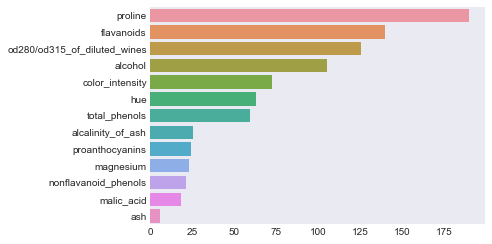

In [65]:
# seleziono solo le features con uno score superiore a 50
print('Le features con un\'importanza superiore a 50 sono', len([score for score in selector.scores_ if score > 50 ]))

# imposto stile del grafico
plt.style.use('seaborn-dark')

# creo barplot
sns.barplot(y = feature_imp.index, x = feature_imp.values, order = feature_imp.index.to_list())

plt.show()

In [66]:
# creo un selezionatore delle migliori 7 features
selector = SelectKBest(k = 7)

# trasformo la matrice delle features originale
X_train_new = selector.fit_transform(X_train, y_train)
print(X_train_new.shape)

(124, 7)


In [73]:
# creo un nuovo modello da addestrare sulla nuova matrice delle features
random_forest = RandomForestClassifier()

# creo un dizionario coi possibili valori dei parametri
params = {'n_estimators': poisson(mu = 100), 'max_features': randint(low = 3, high = 7), 'random_state' : [42]}

# valido i parametri 
clf = RandomizedSearchCV(estimator = random_forest, param_distributions = params, n_jobs =-1, scoring = 'accuracy', cv = 5, n_iter = 10, random_state = 42)

# addestro il modello sulla nuova matrice delle features
clf.fit(X_train_new, y_train)

# controllo i migliori valori dei parametri
print(f'''I migliori valori dei parametri sono {clf.best_params_} 
La loro accuratezza media sul training set è {clf.best_score_}''')


I migliori valori dei parametri sono {'max_features': 5, 'n_estimators': 109, 'random_state': 42} 
La loro accuratezza media sul training set è 0.9836666666666666


In [74]:
# applico la selezione anche al test set
X_test_new = selector.fit_transform(X_test, y_test)

# ricalcolo l'accuratezza del modello
clf.score(X_test_new, y_test)

0.9074074074074074

Ricalcolando l'accuratezza risulta evidente che buona parte della performance del modello è prodotta dalle migliori 7 features. Tuttavia l'accuratezza sul test set dopo la feature selection risulta inferiore del 6%, una quantità non trascurabile.